<a href="https://colab.research.google.com/github/Royarind/Machine_Learning_Projects/blob/main/SMS_EMAIL_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [61]:
!pip install nltk

In [43]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [44]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**DATA CLEANING**

1. Dropping last three columbs

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [46]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [47]:
df.sample(5)

,v1,v2
533,ham,I'll be late...
1087,ham,You can never do NOTHING
5398,ham,Hi. Hope you had a good day. Have a better night.
4636,ham,Oh ho. Is this the first time u use these type...
5323,ham,Aah bless! How's your arm?


2. Renaming the Columns

In [48]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [49]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


3. Change target values from text to number SPAM=1, HAM=0

In [50]:
df.value_counts('target')

,count
target,
ham,4825
spam,747


In [51]:
df.replace({'target':{'spam':1,'ham':0}},inplace=True)

In [52]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


4. Check missing values

In [53]:
df.isnull().sum()

,0
target,0
text,0


5. Check for Duplicate Values

In [54]:
df.duplicated().sum()

np.int64(403)

Drop Duplicates

In [55]:
df = df.drop_duplicates(keep='first')

**EDA**

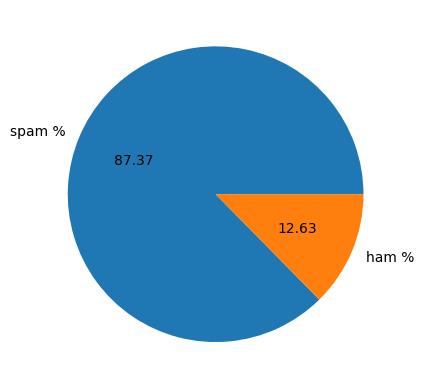

In [56]:
plt.pie(df["target"].value_counts(),labels=["spam %","ham %"],autopct="%0.2f")
plt.show()

DATA is HIGHLY IMBALANCED

Feature **Engineering**

In [57]:
df["num_chars"] = df["text"].apply(len)

In [58]:
# Num of Words

In [65]:
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [66]:
#Num of sentences

In [69]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [70]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<function matplotlib.pyplot.show(close=None, block=None)>

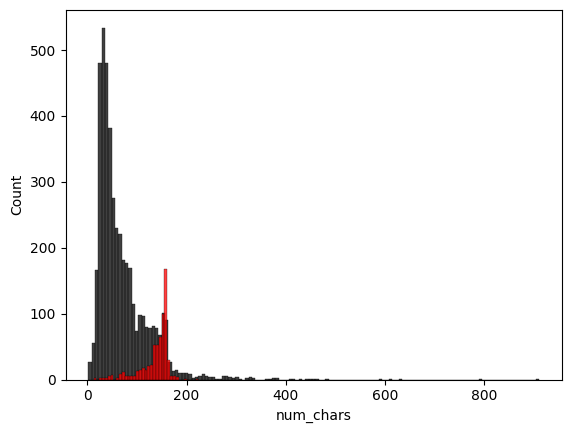

In [76]:
sns.histplot(df[df["target"]==0]['num_chars'],color='black') #Ham
sns.histplot(df[df['target']==1]['num_chars'],color='red') #Spam
plt.show

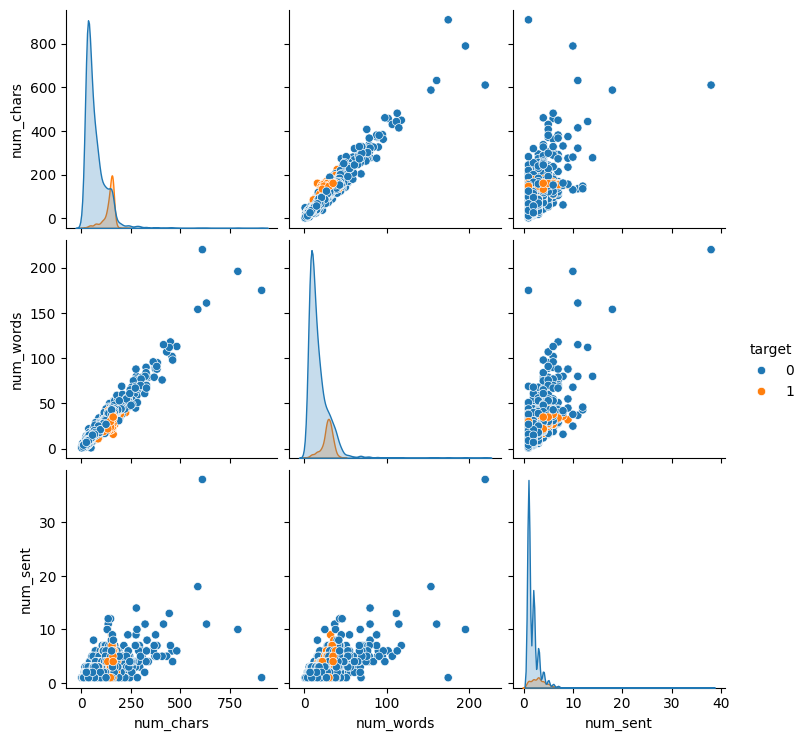

In [79]:
sns.pairplot(df,hue='target')
plt.show()

In [83]:
df[["target","num_chars","num_words","num_sent"]].corr()

,target,num_chars,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


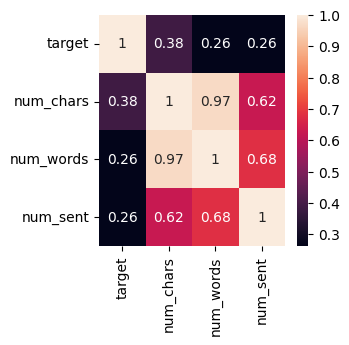

In [87]:
plt.figure(figsize=(3,3))
sns.heatmap(df[["target","num_chars","num_words","num_sent"]].corr(),annot=True)
plt.show()

**DATA** **PREPROCESSING**

In [105]:
def transform_text(text):
    text = text.lower() #Lowercase
    text = nltk.word_tokenize(text) #Tokenize
    y = []
    for i in text:
        if i.isalnum():
            y.append(i) #Remove sprecial chars

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i) #Remove stopwords

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(word=i)) #Stemming

    return " ".join(y)

In [107]:
transform_text("I love to ##@@$ play footBALL very very MUCH!!")

'love play footbal much'

In [108]:
df["transformed_text"] = df['text'].apply(transform_text)

In [109]:
df.head()

,target,text,num_chars,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [114]:
spam_corpus = []
for msg in df[df['target']== 1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [116]:
len(spam_corpus)

9939

In [120]:
pd.DataFrame(Counter(spam_corpus).most_common(40))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


**MODEL BUILDING** using NAIVE BAYES

In [140]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf  = TfidfVectorizer()

In [141]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [142]:
y = df['target'].values

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [145]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [146]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [147]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [148]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [149]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
